In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import pearsonr, linregress
import numpy as np
import pandas as pd

### Data Cleaning

In [2]:
# import and clean emissions_df
emissions_df = pd.read_csv('Resources/co2_emissions_kt_by_country.csv')
emissions_df = emissions_df[['country_name', 'year', 'value']]
emissions_df.columns = ['Country', 'Year', 'CO2_Emissions']
emissions_df.head()

,Country,Year,CO2_Emissions
0,Aruba,1960,11092.675
1,Aruba,1961,11576.719
2,Aruba,1962,12713.489
3,Aruba,1963,12178.107
4,Aruba,1964,11840.743


In [3]:
# Count occurrences of each country
country_counts = emissions_df['Country'].value_counts()

# Display
country_counts

Country
St. Lucia                    60
Haiti                        60
Lao PDR                      60
Lebanon                      60
Liberia                      60
                             ..
West Bank and Gaza           27
Turks and Caicos Islands     27
Kosovo                        9
Curacao                       5
Sint Maarten (Dutch part)     3
Name: count, Length: 256, dtype: int64

In [4]:
# import and clean pesticide_df
pesticide_df = pd.read_csv('Resources/pesticide-use-tonnes.csv')
pesticide_df = pesticide_df[['Entity', 'Year', 'Pesticides (total) | 00001357 || Agricultural Use | 005157 || Tonnes']]
pesticide_df.columns = ['Country', 'Year', 'Pesticides_Used']
pesticide_df['Country'] = pesticide_df['Country'].str.replace(r"\s*\(.*\)", "", regex=True).str.strip()
pesticide_df.head()

,Country,Year,Pesticides_Used
0,Africa,1990,73958.66
1,Africa,1991,69956.26
2,Africa,1992,60260.71
3,Africa,1993,54301.62
4,Africa,1994,58819.04


In [5]:
# Count occurrences of each country
country_counts = pesticide_df['Country'].value_counts()

# Display
country_counts

Country
China                 64
Africa                32
Oceania               32
New Caledonia         32
New Zealand           32
                      ..
Sint Maarten          11
Belgium-Luxembourg    10
Czechoslovakia         3
USSR                   2
Yugoslavia             2
Name: count, Length: 248, dtype: int64

In [6]:
# import and clean population_df
population_df = pd.read_csv('Resources/population.csv')
population_df = population_df[['Entity', 'Year', 'Population (historical)']]
population_df.columns = ['Country', 'Year', 'Population']
population_df.head()

,Country,Year,Population
0,Afghanistan,-10000,14737
1,Afghanistan,-9000,20405
2,Afghanistan,-8000,28253
3,Afghanistan,-7000,39120
4,Afghanistan,-6000,54166


In [7]:
# Count occurrences of each country
country_counts = population_df['Country'].value_counts()

# Display
country_counts

Country
European Union (27)              265
Asia                             265
High-income countries            265
North America                    265
Lower-middle-income countries    265
                                ... 
Yemen Arab Republic               23
Yemen People's Republic           23
East Germany                       8
West Germany                       8
Akrotiri and Dhekelia              3
Name: count, Length: 271, dtype: int64

In [8]:
# import and clean cc_impact_on_ag_df
cc_impact_on_ag_df = pd.read_csv('Resources/climate_change_impact_on_agriculture_2024.csv')
cc_impact_on_ag_df = cc_impact_on_ag_df[['Year', 'Country', 'Crop_Yield_MT_per_HA', 'Pesticide_Use_KG_per_HA']]
cc_impact_grouped = cc_impact_on_ag_df.groupby(['Country', 'Year']).mean().reset_index()
cc_impact_grouped.columns = ['Country', 'Year', 'Mean_Crop_Yield_MT_per_HA', 'Mean_Pesticide_Use_KG_per_HA']
cc_impact_grouped.head()

,Country,Year,Mean_Crop_Yield_MT_per_HA,Mean_Pesticide_Use_KG_per_HA
0,Argentina,1990,2.400480,26.308400
1,Argentina,1991,2.089216,28.136486
2,Argentina,1992,2.192125,29.538750
3,Argentina,1993,2.147947,25.887368
4,Argentina,1994,1.815600,23.214000


In [9]:
# Count occurrences of each country
country_counts = cc_impact_grouped['Country'].value_counts()

# Display
country_counts

Country
Argentina    35
Australia    35
Brazil       35
Canada       35
China        35
France       35
India        35
Nigeria      35
Russia       35
USA          35
Name: count, dtype: int64

In [10]:
# check data types of dfs
print(f"\n emissions_df : ")
emissions_df.info()

print(f"\n pesticide_df: ")
pesticide_df.info()

print(f"\n population_df: ")
population_df.info()

print(f"\n cc_impact_grouped: ")
cc_impact_grouped.info()


 emissions_df : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        13953 non-null  object 
 1   Year           13953 non-null  int64  
 2   CO2_Emissions  13953 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 327.1+ KB

 pesticide_df: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7705 entries, 0 to 7704
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          7705 non-null   object 
 1   Year             7705 non-null   int64  
 2   Pesticides_Used  7705 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 180.7+ KB

 population_df: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59177 entries, 0 to 59176
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  --

### Merge Data

In [11]:
# Merge dfs
merged_df = pd.merge(emissions_df, pesticide_df, on=['Country', 'Year'], how='inner')
merged_df = pd.merge(merged_df, population_df, on=['Country', 'Year'], how='inner')
merged_df = pd.merge(merged_df, cc_impact_grouped, on=['Country', 'Year'], how='inner')
merged_df

,Country,Year,CO2_Emissions,Pesticides_Used,Population,Mean_Crop_Yield_MT_per_HA,Mean_Pesticide_Use_KG_per_HA
0,Argentina,1990,100320.000000,26156.00,32755907,2.400480,26.308400
1,Argentina,1991,105920.000000,26156.00,33230292,2.089216,28.136486
2,Argentina,1992,107930.000000,26156.00,33693532,2.192125,29.538750
3,Argentina,1993,110260.000000,26156.00,34152718,2.147947,25.887368
4,Argentina,1994,111910.000000,30195.00,34613491,1.815600,23.214000
...,...,...,...,...,...,...,...
265,Nigeria,2015,107760.002136,31255.23,190671883,2.296892,22.640270
266,Nigeria,2016,110830.001831,26751.43,195443699,2.261244,27.208222
267,Nigeria,2017,108500.000000,36466.57,200254578,2.413250,21.509643
268,Nigeria,2018,109889.999390,47121.31,204938753,2.410724,30.836552


In [12]:
# Count occurrences of each country
country_counts = merged_df['Country'].value_counts()

# Display
country_counts

Country
China        60
Argentina    30
Australia    30
Brazil       30
Canada       30
France       30
India        30
Nigeria      30
Name: count, dtype: int64

In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       270 non-null    object 
 1   Year                          270 non-null    int64  
 2   CO2_Emissions                 270 non-null    float64
 3   Pesticides_Used               270 non-null    float64
 4   Population                    270 non-null    int64  
 5   Mean_Crop_Yield_MT_per_HA     270 non-null    float64
 6   Mean_Pesticide_Use_KG_per_HA  270 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 14.9+ KB


In [14]:
merged_cols = merged_df.columns.tolist()
merged_cols

['Country',
 'Year',
 'CO2_Emissions',
 'Pesticides_Used',
 'Population',
 'Mean_Crop_Yield_MT_per_HA',
 'Mean_Pesticide_Use_KG_per_HA']

In [15]:
# check stats
merged_df.describe()

,Year,CO2_Emissions,Pesticides_Used,Population,Mean_Crop_Yield_MT_per_HA,Mean_Pesticide_Use_KG_per_HA
count,270.000000,2.700000e+02,270.000000,2.700000e+02,270.000000,270.000000
mean,2004.500000,1.686077e+06,130068.154481,4.695220e+08,2.241645,25.187954
std,8.671515,2.764942e+06,123973.605468,5.593517e+08,0.200797,2.769867
min,1990.000000,7.277000e+04,948.790000,1.712630e+07,1.735667,18.301818
25%,1997.000000,2.639125e+05,37527.750000,3.690987e+07,2.115162,23.247200
50%,2004.500000,3.870200e+05,74765.500000,1.430372e+08,2.239486,25.103804
75%,2012.000000,1.871265e+06,214459.607500,1.184574e+09,2.372683,27.024125
max,2019.000000,1.070722e+07,620538.000000,1.423520e+09,2.860440,34.142000


### Linear Regressions

In [16]:
# function for linear regression and pearsons r
def plot_correlation(df, x_label, y_label, agg_func='mean'):
    
    # Group the DataFrame by 'Year' and apply the aggregation function
    if agg_func == 'mean':
        grouped_df = df.groupby('Year')[[x_label, y_label]].mean().dropna()
    elif agg_func == 'sum':
        grouped_df = df.groupby('Year')[[x_label, y_label]].sum().dropna()
    else:
        raise ValueError("agg_func must be either 'mean' or 'sum'")

    # Get x and y data (grouped by Year)
    x = grouped_df[x_label]
    y = grouped_df[y_label]

    # Check if x and y have enough data points
    if len(x) < 2 or len(y) < 2:
        print("Not enough data points to perform correlation analysis.")
        return

    # Perform linear regression
    slope, intercept, r, p, std_err = linregress(x, y)
    line = slope * x + intercept

    # Create the scatter plot
    plt.scatter(x, y)
    plt.plot(x, line, "--", color='red')  # Use red dashed line for the regression line
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{x_label} vs {y_label} (Grouped by Year)")
    plt.show()

    # Print the Pearson correlation coefficient
    correlation_coefficient = round(pearsonr(x, y)[0], 2)
    print(f"The correlation coefficient between {x_label} and {y_label} is {correlation_coefficient}")


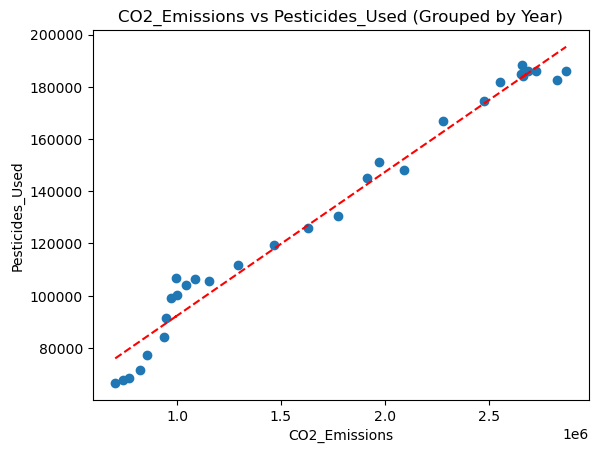

The correlation coefficient between CO2_Emissions and Pesticides_Used is 0.99


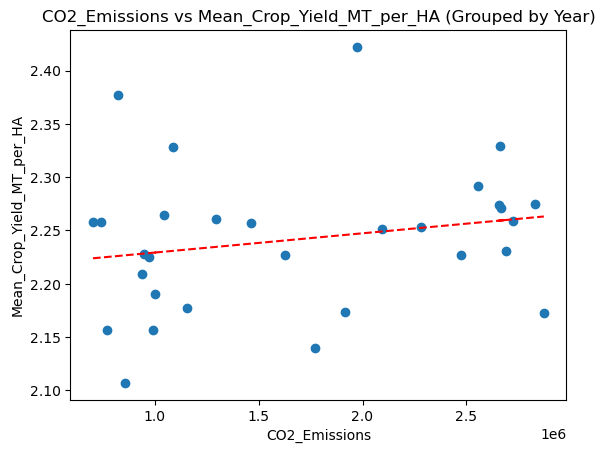

The correlation coefficient between CO2_Emissions and Mean_Crop_Yield_MT_per_HA is 0.21


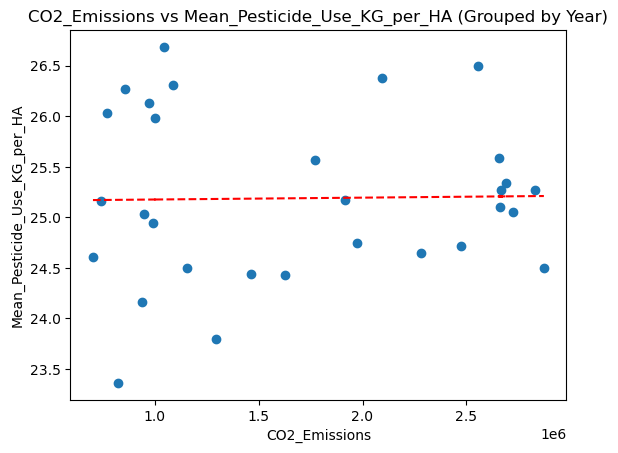

The correlation coefficient between CO2_Emissions and Mean_Pesticide_Use_KG_per_HA is 0.02


In [17]:
# list to loop through
crop_vars = ['Pesticides_Used', 'Mean_Crop_Yield_MT_per_HA', 'Mean_Pesticide_Use_KG_per_HA']

# Loop through list to investigate the correlation between CO2 emissions and other variables
for var in crop_vars:
    plot_correlation(merged_df, 'CO2_Emissions', var, agg_func='mean')